### Implementation of StatQuest Video for SVM
#### https://youtu.be/efR1C6CvhmE

This example starts with 1-d data (points) and moving it up to 2d (line), 3d (plane), nd (hyperplane), Support Vector Classifier, Support Vector Machines

The example takes mass of mice as input for supervised learning and predicts it as obese/not obese. It also demonstrates the challenges for the data and the workarounds using hyperplanes and SVM.

In [1]:
# input dataset contains mice weight between 1gm to 100 gm with a hypothetical
# maximum weight reported as not obese is 46gm
# minimum weight reported as obese is 58gm

# dataset
# mass	5	7	12	14	17	20	23	27	36	46	58	59	63	64	75	81	86	88	97	99
#obese	N	N	N	N	N	N	N	N	N	N	Y	Y	Y	Y	Y	Y	Y	Y	Y	Y

In [2]:
# import the dataset

import csv

# sample file should be available in same folder as where
# code file is present else use full path
with open('Support Vector Classifier Dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t Column0 value is : {row[0]}.\tColumn01 value is : {row[1]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are mass, obese
	 Column0 value is : 20.	Column01 value is : N.
	 Column0 value is : 67.	Column01 value is : Y.
	 Column0 value is : 27.	Column01 value is : N.
	 Column0 value is : 69.	Column01 value is : Y.
	 Column0 value is : 36.	Column01 value is : N.
	 Column0 value is : 99.	Column01 value is : Y.
	 Column0 value is : 5.	Column01 value is : N.
	 Column0 value is : 75.	Column01 value is : Y.
	 Column0 value is : 17.	Column01 value is : N.
	 Column0 value is : 7.	Column01 value is : N.
	 Column0 value is : 14.	Column01 value is : N.
	 Column0 value is : 64.	Column01 value is : Y.
	 Column0 value is : 63.	Column01 value is : Y.
	 Column0 value is : 46.	Column01 value is : N.
	 Column0 value is : 86.	Column01 value is : Y.
	 Column0 value is : 81.	Column01 value is : Y.
	 Column0 value is : 12.	Column01 value is : N.
	 Column0 value is : 97.	Column01 value is : Y.
	 Column0 value is : 88.	Column01 value is : Y.
	 Column0 value is : 23.	Column01 value is : N.
Processed 21 

In [3]:
import pandas as pd
df = pd.read_csv('Support Vector Classifier Dataset.csv')  

In [4]:
grouped_df = df.groupby("obese")

In [5]:
maximums = grouped_df.max()
minimums = grouped_df.min()
print('MAXIMUMS ', maximums)
print('MINIMUMS ', minimums)

MAXIMUMS         mass
obese      
N        46
Y        99
MINIMUMS         mass
obese      
N         5
Y        63


In [6]:
def get_edges():
    # let's define edges on the basis of maximum and minimum weight
    return df[df.obese.eq('N')].max().mass, df[df.obese.eq('Y')].min().mass # notObese_max, obese_min


In [7]:
edge_cluster01, edge_cluster02 = get_edges()

threshold = edge_cluster01;
    
print('Edge of Cluster 01 (Not Obese Max) \t:', edge_cluster01)
print('Edge of Cluster 02 (Obese Min) \t\t:', edge_cluster02)
print('Threshold \t\t\t\t:', threshold)


Edge of Cluster 01 (Not Obese Max) 	: 46
Edge of Cluster 02 (Obese Min) 		: 63
Threshold 				: 46


In [8]:
def predict_obese(p_weight):
    
    print('Distance from Not Obese Max (Edge of Cluster 01) : ', abs(p_weight - edge_cluster01))
    print('Distance from Obese Min (Edge of Cluster 02) : ', abs(p_weight - edge_cluster02))
    print('Defined Threshold : ', threshold)
    
    if p_weight <= threshold:
        return 'Not Obese\n'
    else:
        return 'Obese\n'

In [9]:

inputWeight = 43
predictedWeight = predict_obese(inputWeight)
print('Input Weight is ', inputWeight, 'gm. Prediction : ', predictedWeight)

inputWeight = 71
predictedWeight = predict_obese(inputWeight)
print('Input Weight is ', inputWeight, 'gm. Prediction : ', predictedWeight)


Distance from Not Obese Max (Edge of Cluster 01) :  3
Distance from Obese Min (Edge of Cluster 02) :  20
Defined Threshold :  46
Input Weight is  43 gm. Prediction :  Not Obese

Distance from Not Obese Max (Edge of Cluster 01) :  25
Distance from Obese Min (Edge of Cluster 02) :  8
Defined Threshold :  46
Input Weight is  71 gm. Prediction :  Obese



#### <font color=red>Problem : An input weight of 47 will be predicted as Obese which is closer to non-obese then obese.

In [10]:
inputWeight = 47
predictedWeight = predict_obese(inputWeight)
print('Input Weight is ', inputWeight, 'gm. Prediction : ', predictedWeight)

Distance from Not Obese Max (Edge of Cluster 01) :  1
Distance from Obese Min (Edge of Cluster 02) :  16
Defined Threshold :  46
Input Weight is  47 gm. Prediction :  Obese



#### <font color=green>WorkAround : Define threshold at the mid of min and max value of each category

In [11]:
print('Existing Threshold : ', threshold)
threshold = (edge_cluster01 + edge_cluster02)/2
print('Updated Threshold : ', threshold)


Existing Threshold :  46
Updated Threshold :  54.5


In [12]:
# now if we try to predict for Problem 01 case, a better prediction would be made
inputWeight = 47
predictedWeight = predict_obese(inputWeight)
print('Input Weight is ', inputWeight, 'gm. Prediction : ', predictedWeight)

Distance from Not Obese Max (Edge of Cluster 01) :  1
Distance from Obese Min (Edge of Cluster 02) :  16
Defined Threshold :  54.5
Input Weight is  47 gm. Prediction :  Not Obese



#### <font color=orange>Terminology Alert : Margin & Maximal Margin Classifier

In [13]:
# distance between edges of each cluster and threshold is called Margin

# if the threshold is kept at mid point from each edge, then the distance between each edge and threhold is maximum 
# and called as Maximal Margin Classifier

print('Margin for Cluster 01 \t : ', abs(edge_cluster01 - threshold))
print('Margin for Cluster 02 \t : ', abs(edge_cluster02 - threshold))


Margin for Cluster 01 	 :  8.5
Margin for Cluster 02 	 :  8.5


#### <font color=red>Problem : Outliers and Maximal Margin Classifier

In [14]:
# Max of Not Obese = 46 gm
# Min of Obese = 63 gm
# Threshold : 54.5

df.sort_values(by=['mass'])

,mass,obese
6,5,N
9,7,N
16,12,N
10,14,N
8,17,N
0,20,N
19,23,N
2,27,N
4,36,N
13,46,N


In [15]:
# let's introduce an outlier 60gm & Not Obsese
df = df.append({'mass': 60.0, 'obese':'N'}, ignore_index=True)
df.sort_values(by=['mass'])

,mass,obese
6,5.0,N
9,7.0,N
16,12.0,N
10,14.0,N
8,17.0,N
0,20.0,N
19,23.0,N
2,27.0,N
4,36.0,N
13,46.0,N


In [16]:
# let's get the new edges for each cluster
edge_cluster01, edge_cluster02 = get_edges()

print('Edge of Cluster 01 (Not Obese Max) \t:', edge_cluster01)
print('Edge of Cluster 02 (Obese Min) \t\t:', edge_cluster02)
print('Threshold \t\t\t\t:', threshold)


Edge of Cluster 01 (Not Obese Max) 	: 60.0
Edge of Cluster 02 (Obese Min) 		: 63.0
Threshold 				: 54.5


In [17]:
# redefine threshold as Maximal Margin Classifier

print('Existing Threshold : ', threshold)
threshold = (edge_cluster01 + edge_cluster02)/2
print('Updated Threshold : ', threshold)

Existing Threshold :  54.5
Updated Threshold :  61.5


In [18]:
# now if we try to predict for 61 gm, an incorrect prediction would be made due to threshold 
# not considering outlier problem

inputWeight = 61
predictedWeight = predict_obese(inputWeight)
print('Input Weight is ', inputWeight, 'gm. Prediction : ', predictedWeight)

Distance from Not Obese Max (Edge of Cluster 01) :  1.0
Distance from Obese Min (Edge of Cluster 02) :  2.0
Defined Threshold :  61.5
Input Weight is  61 gm. Prediction :  Not Obese



#### <font color=red>Problem : Maximal Margin Classfier is too sensitive to outliers.
In this case, the outlier (60, N) has moved the threhold pretty close to Cluster 02 and hence 61 gm is predicted as Not Obese even though it is much closer to Obsese (excluding Outlier).

In [19]:
# let's try to identify any outliers with the help of quantile calculation
df_notObese = df[df.obese.eq('N')]
print('99.9% of not obese data has mass of \t\t\t: ', df_notObese.quantile(0.999).mass.round(1), 'gm')
print('Existing Threshold (needs outlier consideration) \t: ', threshold, 'gm')

99.9% of not obese data has mass of 			:  59.9 gm
Existing Threshold (needs outlier consideration) 	:  61.5 gm


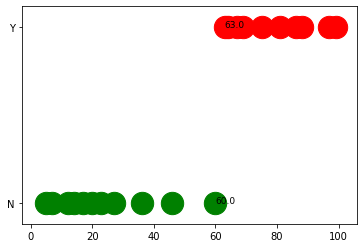

In [20]:
# visualizing the distribution
import matplotlib.pyplot as plt
%matplotlib inline

for ind in df.index: 
    x = df['mass'][ind]
    y = df['obese'][ind]
    if y == 'Y': # Obsese = red
        plt.scatter(x,y,color='r', s=500)
        if x == edge_cluster02:
            plt.text(x, y, x, fontsize=9)
    else:
        plt.scatter(x,y,color='g',s=500)
        if x == edge_cluster01:
            plt.text(x, y, x, fontsize=9)

#plt.legend(d.keys())
plt.show()

#### <font color=blue>Workaround : Allowing misclassfication for outliers. Low Bias - High Variance >> High Bias - Low Variance

In [21]:
# to allow misclassification, we may define a function which can identify and remove outliers and 
# then define a new threshold based on less outlier prone data.
# or we can use some other strategy to allow misclassification.

# temporarily, we are not building a well defined function
# just removing the outlier as a hard-code
df_outlier = df[ df['mass'] == 60 ]
df = df.drop(df_outlier.index, axis=0) # Step 2


In [22]:
# redefine threshold after outlier removal
edge_cluster01, edge_cluster02 = get_edges()

print('Existing Threshold : ', threshold)
threshold = (edge_cluster01 + edge_cluster02)/2
print('Updated Threshold : ', threshold)

Existing Threshold :  61.5
Updated Threshold :  54.5


### <font color=orange>Terminologies Alert :
    

#### <font color=orange> Soft Margin : When we allow misclassification, then the distance between edges and identified threshold is called "Soft Margin".

#### <font color=orange>  Soft Margin Classifier aka Support Vector Classifier : 
    
The issue to understand is how many misclassification shall the algorithm accepts before finalizing a threshold. This is done by "Cross Validation" which calculates the number of misclassfication vs number of correct predictions. For above case, if we allow 01 misclassification, we get one correct prediction of 61 gms as Obese even though threshold before outlier is 61.5.

When soft margins are used to make prediction, then we are using Soft Margin Classfier aka Support Vector Classifier in which case the edges are called as Support Vectors.


#### <font color=orange>  Support Vector Classifier for multi-dimensional data:
    
When the data is 1 dimensional, then the Support Vector Classifier is a point.

When the data is 2 dimensional (say mass & age as features and obese being the label) then the SVC is a line.

When the data is 3 dimensional (say mass, age & height as feature and obese as label) then the SVC is a plane.

When the data is 4 dimensional (say mass, age,height & BP feature and obese as label) then the SVC is a hyperplane.



#### <font color=orange>  Mathematical Jargons
    
Point : a flat affine with 0-dimensional subspace (for 1-dimensional data say mass as feature and obese as label)

Line  : a flat affine with 1-dimensional subspace (for 2-dimensional data say mass & age as feature and obese as label)

Plane : a flat affine with 2-dimensional subspace (for 3-dimensional data say mass, age, height as feature and obese as label)

HyperPlane : a flat affine with (n-1) dimensional subspace (for n-dimensional data say mass,age,height,BP.. and obese as label)


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

# <font color=green>Support Vector Machines

SVC are good for data which are directly/inversly proportional like mass and obese. Less the mass are not obese and more mass are obese (ignoring outliers).

For data which is not directly proportional like medicine dosage and cure where a less dose or more dose will not result in cure and only the perfect dose range will result in cure. In such case, SVC will not be able to define any threhold as the data is completely overlapping. Such situation requires SVM to take over.

In [24]:
# import the dataset

import csv

# sample file should be available in same folder as where
# code file is present else use full path
with open('Support Vector Machines Dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t Column0 value is : {row[0]}.\tColumn01 value is : {row[1]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are dosage, cured
	 Column0 value is : 17.	Column01 value is : N.
	 Column0 value is : 36.	Column01 value is : N.
	 Column0 value is : 4.	Column01 value is : N.
	 Column0 value is : 48.	Column01 value is : N.
	 Column0 value is : 26.	Column01 value is : Y.
	 Column0 value is : 44.	Column01 value is : N.
	 Column0 value is : 30.	Column01 value is : Y.
	 Column0 value is : 11.	Column01 value is : N.
	 Column0 value is : 7.	Column01 value is : N.
	 Column0 value is : 24.	Column01 value is : Y.
	 Column0 value is : 13.	Column01 value is : N.
	 Column0 value is : 27.	Column01 value is : Y.
	 Column0 value is : 3.	Column01 value is : N.
	 Column0 value is : 29.	Column01 value is : Y.
	 Column0 value is : 9.	Column01 value is : N.
	 Column0 value is : 23.	Column01 value is : Y.
	 Column0 value is : 40.	Column01 value is : N.
	 Column0 value is : 20.	Column01 value is : Y.
	 Column0 value is : 2.	Column01 value is : N.
	 Column0 value is : 21.	Column01 value is : Y.
Processed 21 l

In [ ]:
# for above dataset, we can convert this 1d data to 2d data by creating a y-axis with sqaured of dosage.
# so X axis will have dosage and Y axis will have dosage**2 and label will be cured/not cured. 
# Based on this 2d data, we can create SVC as usual and perform predictions.

# More terminologies better explained in video then implementation

# polynomial kernel
# radial kernel
# kernel trick